In [20]:
!pip install WunderWeather 
!pip install arrow
import arrow 
from WunderWeather import weather 
import pandas as pd
import datetime 
import numpy as np
import json
import requests as req
from datetime import date
import matplotlib.pyplot as plt
import calendar
import csv


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
#import data



uber_july_raw = "uber-raw-data-jul14.csv"



uber_aug_raw = "uber-raw-data-aug14.csv"



uber_sep_raw = "uber-raw-data-sep14.csv"


In [22]:
uber_july_raw1 = pd.read_csv(uber_july_raw)
uber_july_raw1.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [23]:
uber_aug_raw2 = pd.read_csv(uber_aug_raw)
uber_aug_raw2.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [24]:
uber_sep_raw3 = pd.read_csv(uber_sep_raw)
uber_sep_raw3.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [25]:
# Union 3 uber datasets together

uber_july_aug = uber_july_raw1.append(uber_aug_raw2)
uber_data_raw = uber_july_aug.append(uber_sep_raw3)
#uber_test = uber_data_raw.sample(1000)
#uber_test["Date/Time"]
uber_data_raw
#uber_data_raw.get(2644)

#Rename 'name' to 'school'
Date_Time = uber_data_raw.rename(columns={"Date/Time": "Date and Time"})
Date_Time.head(50)

,Date and Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [26]:
api_key = 'd7d186106c596762'
extractor = weather.Extract('d7d186106c596762')
#zip = '02481'
location = 'NY/New York'
dates=[]
temps=[]
dict={}

begin_date = arrow.get("201407","YYYYMM")
end_date = arrow.get("201410","YYYYMM").shift(days=-1)
for date in arrow.Arrow.range('day',begin_date,end_date):
  
  date_weather = extractor.date(location,date.format('YYYYMMDD'))

 
  for observation in date_weather.observations:
    date=observation.date_pretty
    
    dates.append(date)
    
    temp=observation.temp_f
    temps.append(temp)
    #print("Date:",observation.date_pretty)
    #print("Temp:",observation.temp_f)
    
    
    dict["dates"]=dates
    dict["temps"]=temps
    

In [27]:
ok = dict["dates"][0]
ok2= ok.replace(" EDT","")

date_info=[datetime.datetime.strptime(d.replace(" EDT",""), "%I:%M %p on %B %d, %Y") for d in dates]

    
SomeList = []
SomeList2 = SomeList.append
    
for i in date_info:
    a = i.strftime("%m/%d/%Y, %H") 
    SomeList.append(a)
#print (SomeList)


In [28]:
frame_df = pd.DataFrame({"Date and Time":SomeList,
                         "Temperature per Day and Hour": temps, 
                         
                         #"Uber Date and Time": uber_data_raw.get(2644)
                        })



In [29]:
frame_df["Clean_Date"] = pd.to_datetime(frame_df["Date and Time"], format="%m/%d/%Y, %H").dt.date


frame_df["New_Temp"] = frame_df["Temperature per Day and Hour"].apply(pd.to_numeric)


groupby_date = frame_df.groupby("Clean_Date")

average_temp = groupby_date["New_Temp"].mean()

#print(average_temp)

In [30]:
frame_df2 = pd.DataFrame({"Date and Time":frame_df["Clean_Date"],
                         "Temperature per Day and Hour": frame_df["New_Temp"]
                          
                         #"Uber Date and Time": uber_data_raw.get(2644)
                        })
#frame_df2

In [31]:
merged_df = frame_df2.merge(Date_Time, how = "left", on = "Date and Time")

#merged_df

In [13]:
merged_df.dropna(axis=1, how='all')


,Date and Time,Temperature per Day and Hour
0,2014-07-01,75.0
1,2014-07-01,75.0
2,2014-07-01,73.9
3,2014-07-01,73.0
4,2014-07-01,73.0
5,2014-07-01,72.0
6,2014-07-01,73.9
7,2014-07-01,75.0
8,2014-07-01,75.9
9,2014-07-01,79.0


In [32]:
merged_df.set_index('Date and Time')

,Temperature per Day and Hour,Lat,Lon,Base
Date and Time,,,,
2014-07-01,75.0,NaN,NaN,NaN
2014-07-01,75.0,NaN,NaN,NaN
2014-07-01,73.9,NaN,NaN,NaN
2014-07-01,73.0,NaN,NaN,NaN
2014-07-01,73.0,NaN,NaN,NaN
2014-07-01,72.0,NaN,NaN,NaN
2014-07-01,73.9,NaN,NaN,NaN
2014-07-01,75.0,NaN,NaN,NaN
2014-07-01,75.9,NaN,NaN,NaN


In [33]:
ByMeanTemp = merged_df.groupby('Date and Time').agg(np.mean) 
#ByMeanTemp

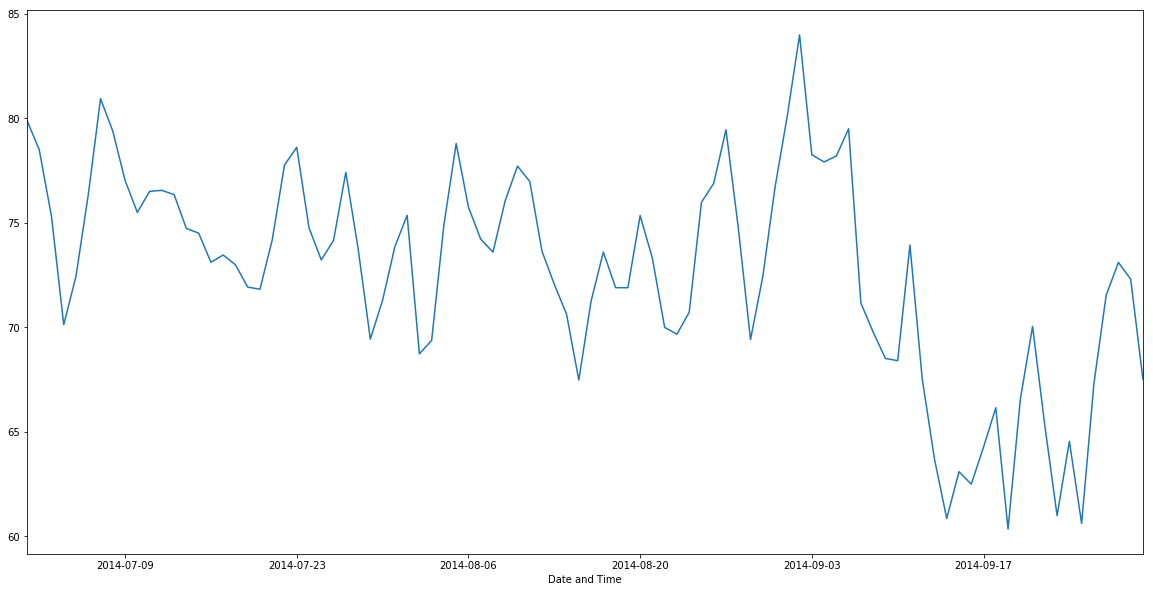

In [34]:
ByMeanTemp["Temperature per Day and Hour"].plot(figsize=(20,10))
plt.show()